# Titatic: machine learning from disaster

## My first kaggle competition attempt

The most popular of Kaggle competitions, and the one I will solve here, is about predicting which passengers survived the sinking of the Titanic.

I've downloaded test.csv and train.csv. Firstly let's read and analyse train.csv.

In [3]:
import pandas as pd

train = pd.read_csv("train.csv")
train_shape = train.shape

In [4]:
train.shape

(891, 12)

In [5]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Presumably, factors that determine survival are: Sex, Age, social class. Let's visualise and check it.

Below graph showing survival in function of sex...

In [6]:
import matplotlib.pyplot as plt

sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

<Figure size 640x480 with 1 Axes>

...and social class.

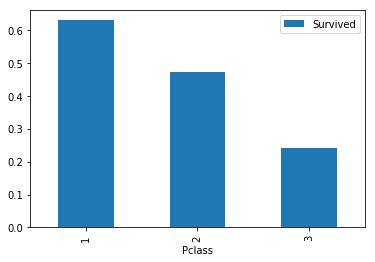

In [7]:
sex_pivot = train.pivot_table(index="Pclass",values="Survived")
sex_pivot.plot.bar()
plt.show()

In [8]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Let's check how age determined survival or no survival.

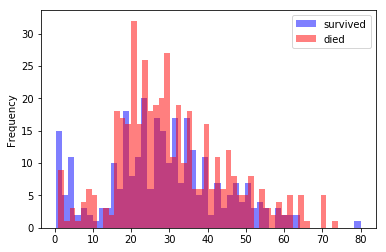

In [9]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]

survived["Age"].plot.hist(alpha=0.5,color="blue", bins=50)
died["Age"].plot.hist(alpha=0.5,color="red", bins=50)
plt.legend(['survived', 'died'])
plt.show()

Let's add a column for age categories. Where age value is not provided, we have "Missing".

In [10]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)    
    return df

cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", "Infant", "Child", "Teenager", "Young Adult", "Adult", "Senior"]

In [11]:
test = pd.read_csv("test.csv")

In [12]:
train = process_age(train, cut_points, label_names)
test = process_age(test, cut_points, label_names)

Now, as we have age categories established, let's check how age determined survival.

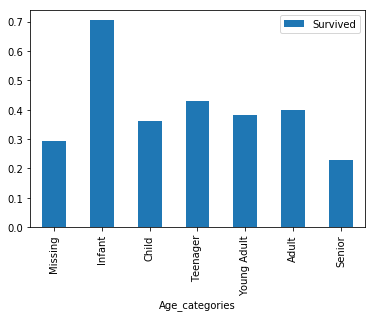

In [13]:
age_pivot = train.pivot_table(index="Age_categories", values="Survived")
age_pivot.plot.bar()
plt.show()

In [14]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

We need to prepare columns for machine learning - algorithm usually understand numerical values and we want to omit suggesting numerical relationship where it is not relevant. This is why we should create 3 dummy columns for Pclass instead of one.

In [15]:
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df, dummies], axis=1)
    return df

In [16]:
train = create_dummies(train, "Pclass")
test = create_dummies(test, "Pclass")

Let's make similar change for Sex and Age_categories columns.

In [17]:
train = create_dummies(train, "Sex")
test = create_dummies(test, "Sex")

In [18]:
train = create_dummies(train, "Age_categories")
test = create_dummies(test, "Age_categories")

Our datasets are now ready to be used for training a model. We will use scikit-learn library and model Logistic Regression. Firstly, we need to instantiate the model.

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

Now, let's fit the model to the training data. We will use columns that we have created before.

In [20]:
columns = list(train.columns[13:])

lr.fit(train[columns], train["Survived"])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Now we need to check the accuracy of our model, so test it. We shouldn't test on the train data, as this is possibility of overfit. Train data doesn't have "Survived" value. What we should do, is split train data into two, specifically 4 sets (train_X, test_X - two sets except "Survived" column, train_y, test_y - two sets of "Survived" column.

To avoid confusion, from now on we will refer to test dataframe as "holdout"

In [21]:
holdout = test

In [22]:
from sklearn.model_selection import train_test_split

all_X = train[columns]
all_y = train["Survived"]

train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.2, random_state=0)

Let's fit our model on new train set and use it for prediction.

In [23]:
lr.fit(train_X, train_y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
from sklearn.metrics import accuracy_score

predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)

Accuracy is expressed as "the percentage of passengers correctly predicted" (to be consistent with Kaggle conditions).

In [25]:
accuracy

0.8100558659217877

As the score is quite high it might mean that our model is overfitting. To have a more reliable accuracy score we can use cross validation to train and test our model on different splits of our data.

In [26]:
import numpy as np
from sklearn.model_selection import cross_val_score

In [28]:
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = np.mean(scores)

print(scores)
print(accuracy)

[0.8        0.81111111 0.7752809  0.87640449 0.80898876 0.78651685
 0.76404494 0.76404494 0.83146067 0.80681818]
0.8024670865963002


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

More exact, result of a k-fold validation accuracy score is 80.2%.

Let's now train the model on holdout (test) data.

In [29]:
columns_test = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

lr = LogisticRegression()
lr.fit(all_X, all_y)

holdout_predictions = lr.predict(holdout[columns_test])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
holdout_predictions.shape

(418,)

In [41]:
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids, "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)
submission.to_csv("submission.csv",index=False)